# BAMA Data Analyser

## Fetch Data

let's do some python request

# important Notes!!!
in kilometer when saving in csv make sure that it's not equal to '-' and it's 0


In [4]:
import requests
from bs4 import BeautifulSoup as soup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import selenium
import pandas as pd
from IPython.display import display, Markdown
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import math
import os
from pathlib import Path
import warnings

In [32]:
requests.get("https://bama.ir/")

<Response [403]>

In [44]:
url = "https://bama.ir/"
cookie = "_ga=GA1.2.484768612.1626633866; __cflb=02DiuFDZJj38KoK7EoAEWmzXoRsWGNYCNxSTVVzf5twn4; _gid=GA1.2.1322776616.1629440599; CSRF-TOKEN-BAMA-COOKIE=CfDJ8J1kbi79JwRGrK8gPtbQQY7L4SFIRZ3mmHPLMvZPHtiNEIj7VKIvoRrfMLVZ4ewl7VwVKsw5MQxSgz4TvDy7vXM0hX5MAXnWUO4tvHFW_K9VKXU1nEiL5juLL-LSX_V0X3RvrsvfsuFtorau33lI-V4; .AspNetCore.Mvc.CookieTempDataProvider=CfDJ8J1kbi79JwRGrK8gPtbQQY4MIgbInCx9oLE0nJ7aM0o5w9AePFoLEEAyEuAuM1dsRAfpfD5EdHbcOhC4az8yB9TGgdD5BsvnR6z8Dhsa8F01seVVIjpPnBT5D41ololat2Gz_ql8QWGuyMPHLoIcHAGSmaOIjuthq-kuCD5bO52zEJsBucUa3rwYuv_Ged5u7w; __cf_bm=c4e7ba29b1da889052a71974ada1a7aee4899479-1629457740-1800-AfHXSt05ljTY9vWdMYRbH4hkqjE0ClTa4fOT/QeAUecCKSJCt/x8tH7lHpn9+IBisc3pF7iwSMBKsOqm2ydDhe5CYTxXgRiGDd5D2jt6aJa0YhVTOprKQeOTEumkmn5ZCOFXAOkr4fOSRtBN2LDMLyOe4oWapBMmJSAzBJXi8pSj"
headers = {"authority": "bama.ir","method": "GET","path": "/","scheme": "https","cookie":cookie,"accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9","accept-encoding": "gzip, deflate, br","accept-language": "fa-IR,fa;q=0.9,en-US;q=0.8,en;q=0.7","sec-ch-ua": '"Chromium";v="92", " Not A;Brand";v="99", "Google Chrome";v="92"',"sec-ch-ua-mobile": "?0","sec-fetch-dest": "document","sec-fetch-mode": "navigate","sec-fetch-site": "none","sec-fetch-user": "?1","upgrade-insecure-requests": "1","user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36"}
#headers = {"accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9","user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36","accept-language": "fa-IR,fa;q=0.9,en-US;q=0.8,en;q=0.7"}
response = requests.get(url,headers=headers)
print(response)
#soup(response.text,"html.parser")


<Response [403]>


In [30]:

session = requests.Session()
response = session.get('https://bama.ir/', headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'})

print(response.status_code)

403


because normal request not working(the site preventing bots to scarp) i try selenium!

In [3]:
! pip3 install selenium

In [29]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import selenium

In [142]:
driver = webdriver.Chrome(r"D:\Anaconda\bin\chromedriver.exe")
driver.get("https://bama.ir/car/renault")
#driver.close()

In [31]:
driver.find_element_by_class_name("title").text

'پژو، 206 | 1400'

In [109]:
driver.find_element_by_class_name("car-func-details").text

'کارکرد 25,000  |  سفید  |  بدون رنگ  |  V8'

In [33]:
driver.find_element_by_class_name("cost").text

'قیمت توافقی'

In [51]:
driver.find_element_by_class_name("mod-date-car-page-outer").text

'7 ساعت پیش'

In [134]:
driver.find_element_by_class_name("car-list-item-li").get_attribute("data-url")

'https://bama.ir/car/detail-ou6au1ac-renault-sandero-at-1395'

So we got this! let's just make it functional

In [5]:
def saveUrlData(url="https://bama.ir/car/all-brands/all-models/all-trims",path=""):
    pageNum = 220
    while(True):
        try:
            driver = webdriver.Chrome(r"D:\Anaconda\bin\chromedriver.exe")
        except Exception as e:
            print(e)
            continue
        driver.get(url+f"?page={pageNum}")
        rawlinkes = driver.find_elements_by_class_name("car-list-item-li")
        rawdetails = driver.find_elements_by_class_name("car-func-details")
        rawcosts = driver.find_elements_by_class_name("cost")
        rawcosts2 = []
        linkes = []
        details = []
        costs = []
        for cost in rawcosts:
            if(cost.text!=""):
                if(cost.text=="حواله"):
                    rawcosts2.append(cost)
                elif(cost.text.split()[1]!="پیش"): 
                    rawcosts2.append(cost)
                    #print(cost.text)
                
        
        if(len(rawcosts2)!=len(rawdetails) or len(rawcosts2)!=len(rawlinkes)):print(f"the page {pageNum} has diffrent raw len")
        for i in range(len(rawcosts2)):
            cost = rawcosts2[i]
            if(cost.get_attribute("class").strip()=="cost single-price" or cost.get_attribute("class").strip()=="cost blured single-price"): 
                costs.append(cost)
                linkes.append(rawlinkes[i])
                details.append(rawdetails[i])
            
                
       
        if(len(costs)!=len(details) or len(costs)!=len(linkes)):print(f"the page {pageNum} has diffrent len")
        for i in range(len(linkes)):
            try:
                if(costs[i].text=="قیمت توافقی" or costs[i].text=="حواله"):
                    #print("car skipped")
                    continue
                
                car = cars(linkes[i].get_attribute("data-url"),details[i],costs[i])
                try:
                    f = open(path+f"{car.name}.csv","r")
                    f.close()
                except:
                    f = open(path+f"{car.name}.csv","a")
                    f.write("Name,Year,Kilometer,Tream,Body,price,link\n")
                    f.close()
                #print(car.makeCSVRow())
                f = open(path+f"{car.name}.csv","a")
                f.write(car.makeCSVRow())
                
                f.close()
            except Exception as e:
                print(e)
                continue
        driver.close()
        pageNum+=1
        if(pageNum%5==0):print(f"pagenumber {pageNum} feteched!")
        if(pageNum==500):break

In [525]:
saveUrlData(path="D:\\carsCsv\\")

pagenumber 225 feteched!
pagenumber 230 feteched!
pagenumber 235 feteched!
pagenumber 240 feteched!
pagenumber 245 feteched!
pagenumber 250 feteched!
pagenumber 255 feteched!
pagenumber 260 feteched!
Message: chrome not reachable

pagenumber 265 feteched!
pagenumber 270 feteched!
pagenumber 275 feteched!
pagenumber 280 feteched!
pagenumber 285 feteched!
pagenumber 290 feteched!
pagenumber 295 feteched!
pagenumber 300 feteched!
pagenumber 305 feteched!
pagenumber 310 feteched!
pagenumber 315 feteched!
pagenumber 320 feteched!
pagenumber 325 feteched!
pagenumber 330 feteched!
pagenumber 335 feteched!
pagenumber 340 feteched!
pagenumber 345 feteched!
pagenumber 350 feteched!
pagenumber 355 feteched!
pagenumber 360 feteched!
pagenumber 365 feteched!
pagenumber 370 feteched!
pagenumber 375 feteched!
pagenumber 380 feteched!
pagenumber 385 feteched!
pagenumber 390 feteched!
pagenumber 395 feteched!
pagenumber 400 feteched!
pagenumber 405 feteched!
pagenumber 410 feteched!
pagenumber 415 fete

## Data Analysing

Here we try to analys pegut-206 file with the most data and then use the models to analys other datas

In [1]:
import pandas as pd
from IPython.display import display, Markdown

In [18]:
def data_explore(df): 
    display(Markdown("## **What does the dataframe look like? First few lines of dataframe:**"))
    print(df.head(), "\n") # what does the dataframe look like?
    display(Markdown('---'))

    display(Markdown("**Size of the Dataset:**"))
    print(df.shape, "\n") # what's size of the dataset? (how many instances we have)
    display(Markdown('---'))

    display(Markdown("**Dataframe Columns:**"))
    print(df.columns, "\n") # what are the columns (features) 
    display(Markdown('---'))

    display(Markdown("**Type of Each Column:**"))
    print(df.info(), "\n" )
    display(Markdown('---'))

    display(Markdown("## **Summary of Features :**"))
    display(Markdown("**Numerical Columns/Features :**"))
    print(df.describe(),"\n") # summary of each feature
    display(Markdown("**Categorical Columns/Feature:**"))
    print(df[["Tream", "Body"]].describe(),"\n")
    display(Markdown('---'))

    display(Markdown("## **Unique Values of Each Categorical Column and Their Counts:**"))
    display(Markdown("**Unique Values of Tream:**"))
    print(df["Tream"].value_counts(),"\n")
    display(Markdown("**Unique Values of Body:**"))
    print(df["Body"].value_counts(),"\n")
    display(Markdown('---'))

    display(Markdown("**Number of Null Values in Dataframe:**"))
    print("Number of Null Values in Dataframe: " )
    print(df.isna().sum())

In [19]:
df = pd.read_csv(r"D:\carsCsv\peugeot-206.csv")
df["Kilometer"].replace('-','-1',inplace=True)
df["Kilometer"] = pd.to_numeric(df["Kilometer"])
df["price"] = df["price"].str.replace(".","",regex=True)
df["price"] = pd.to_numeric(df["price"])//1000000
df.drop(['Name'], axis = 1, inplace=True) 
df.drop(['link'], axis = 1, inplace=True) 
data_explore(df)

## **What does the dataframe look like? First few lines of dataframe:**

   Year  Kilometer     Tream      Body  price
0  1399      37000  ir-type2  no-color    224
1  1396      87000  ir-type5  one-drop    202
2  1399          0  ir-type2  no-color    250
3  1397      68000  ir-type2  no-color    200
4  1397      30000  ir-type2  no-color    207 



---

**Size of the Dataset:**

(651, 5) 



---

**Dataframe Columns:**

Index(['Year', 'Kilometer', 'Tream', 'Body', 'price'], dtype='object') 



---

**Type of Each Column:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       651 non-null    int64 
 1   Kilometer  651 non-null    int64 
 2   Tream      651 non-null    object
 3   Body       651 non-null    object
 4   price      651 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 25.6+ KB
None 



---

## **Summary of Features :**

**Numerical Columns/Features :**

              Year      Kilometer       price
count   651.000000     651.000000  651.000000
mean   1394.960061   79533.044547  200.219662
std       4.761862   83889.941654   50.963721
min    1380.000000      -1.000000   62.000000
25%    1393.000000   14000.000000  173.000000
50%    1397.000000   57000.000000  210.000000
75%    1398.000000  120000.000000  237.500000
max    1400.000000  530000.000000  350.000000 



**Categorical Columns/Feature:**

           Tream      Body
count        651       651
unique         5        16
top     ir-type2  no-color
freq         384       406 



---

## **Unique Values of Each Categorical Column and Their Counts:**

**Unique Values of Tream:**

ir-type2    384
ir-type5    236
ir-type6     22
ir-type3      7
ir-type1      2
Name: Tream, dtype: int64 



**Unique Values of Body:**

no-color           406
one-drop            55
mul-drop            42
two-drop            41
safkari-nocolor     24
copot-change        19
side-color          18
gelgir-change       13
gelgir-color        10
one-door             6
two-door             4
door-change          4
full-color           4
copot-color          2
accident             2
room-change          1
Name: Body, dtype: int64 



---

**Number of Null Values in Dataframe:**

Number of Null Values in Dataframe: 
Year         0
Kilometer    0
Tream        0
Body         0
price        0
dtype: int64


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def histogram(df):
    df.hist(bins=70, figsize=(30,15))
    #save_fig("attribute_histogram_plots")
    plt.show()
    return

# **<center>Histograms for the *train* dataset</centre>**

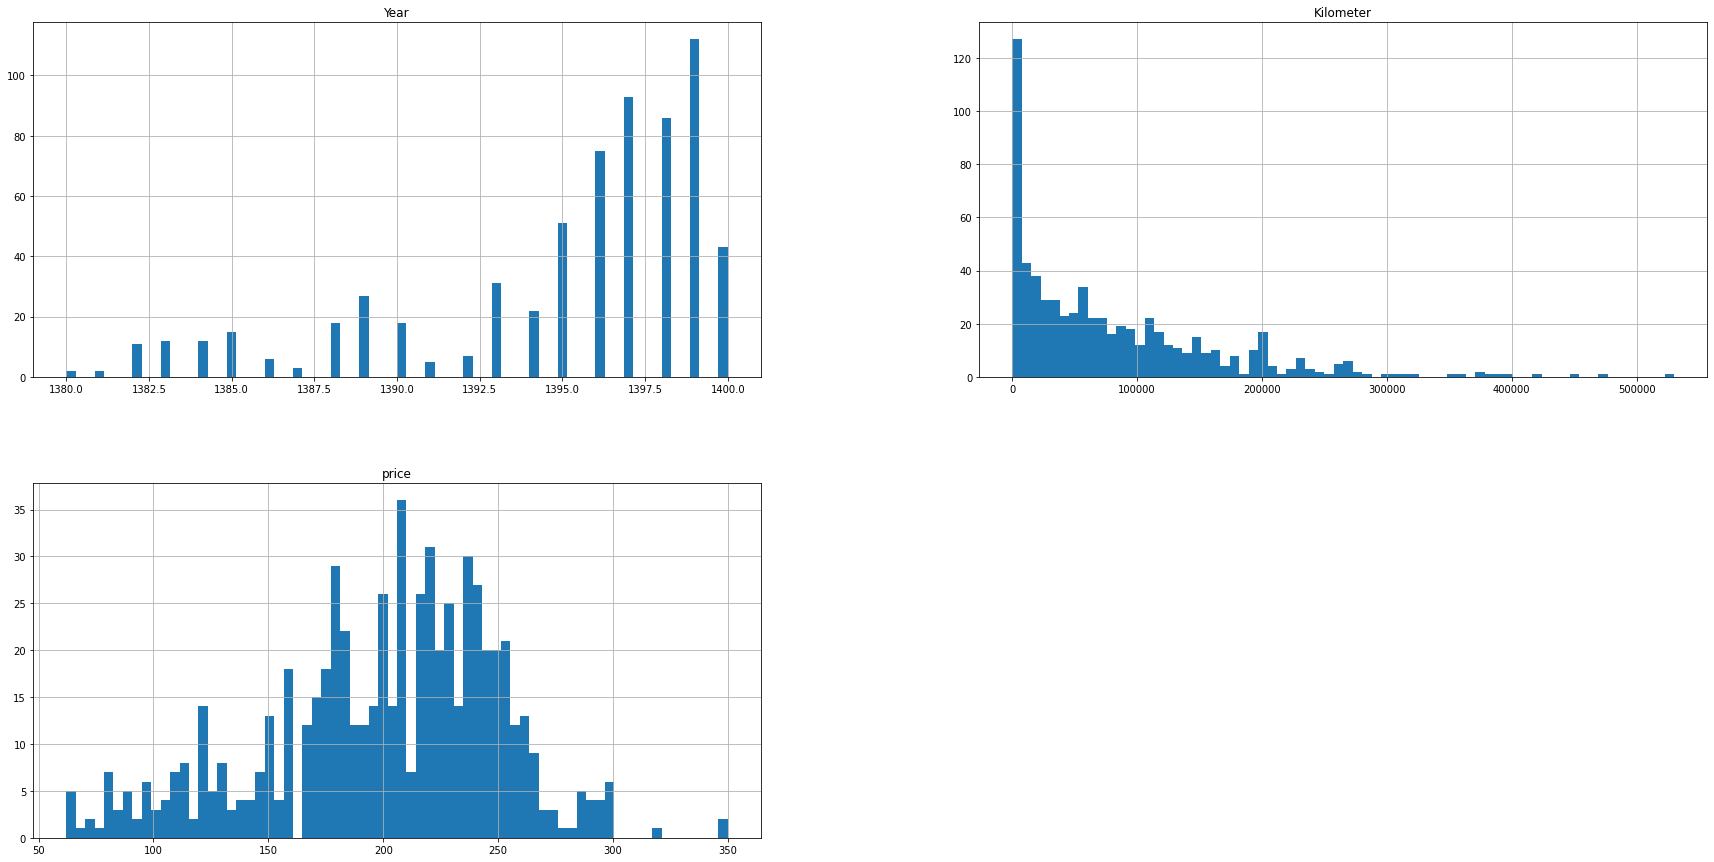

In [17]:
# histograms for train dataset

display(Markdown("# **<center>Histograms for the *train* dataset</centre>**"))
histogram(df)

## **<center>Pairwise Coefficients of Correlation Between Features**

               Year  Kilometer     price
Year       1.000000  -0.815403  0.883040
Kilometer -0.815403   1.000000 -0.800339
price      0.883040  -0.800339  1.000000


## **<center>Pairwise Plots of Correlation Between Features**

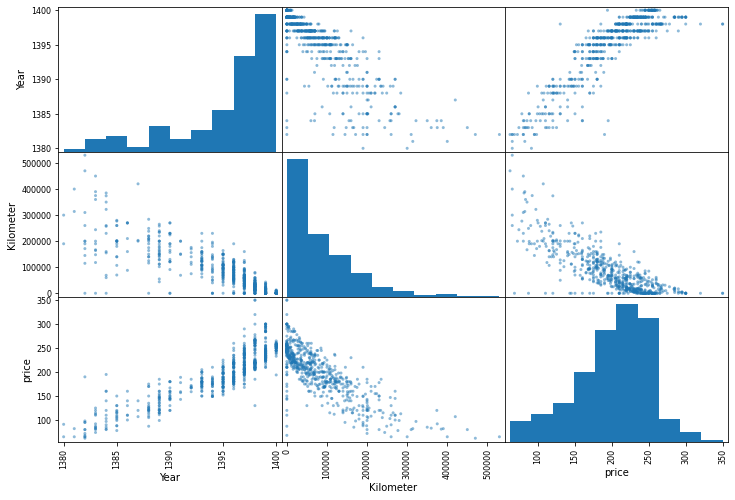

In [34]:
from pandas.plotting import scatter_matrix

def plot_cor(df): 
    corr_matrix = df.corr()
    print(corr_matrix)
    attributes = df.columns
    scatter_matrix(df[attributes], figsize=(12, 8))
    return

display(Markdown("## **<center>Pairwise Coefficients of Correlation Between Features**"))

plot_cor(df)
display(Markdown("## **<center>Pairwise Plots of Correlation Between Features**"))

## **<center>Scatter Plots of SalePrice vs Independent Variables**

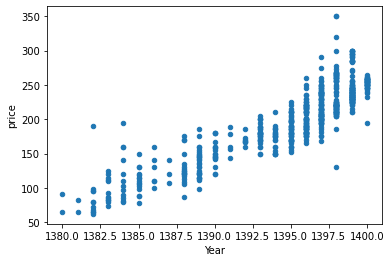

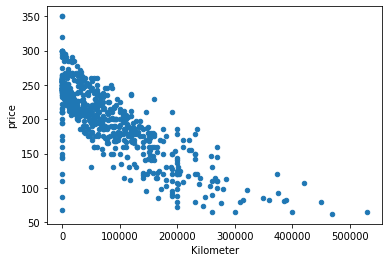

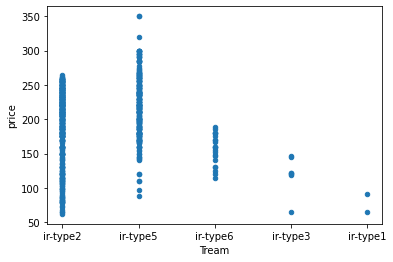

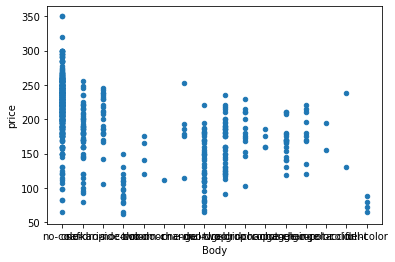

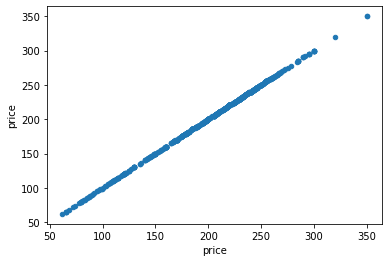

In [33]:
def plot_scatter(df,x): 
    df.plot(kind="scatter", x=x, y="price")
    return
  
for i in df.columns:
    plot_scatter(df,i)

display(Markdown("## **<center>Scatter Plots of SalePrice vs Independent Variables**"))

# Data Preprocessing

Encoding categorical variables

In [14]:
from sklearn.preprocessing import OneHotEncoder

def encoding(dft):
    global df
    Tream = pd.get_dummies(df['Tream'])
    Body = pd.get_dummies(df["Body"])
    columns = pd.concat([Tream, Body,df], axis=1).columns
    
    TreamTest = pd.get_dummies(dft['Tream'])
    BodyTest = pd.get_dummies(dft["Body"])
    dft = pd.concat([TreamTest, BodyTest,dft], axis=1)
    dft = fix_columns( dft, columns )
    dft.drop(columns=['Tream','Body'], inplace=True)  
    return dft

In [15]:
def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0
def fix_columns( d, columns ):  

    add_missing_dummy_columns( d, columns )

    # make sure we have all the columns we need
    assert( set( columns ) - set( d.columns ) == set())

    extra_cols = set( d.columns ) - set( columns )
    if extra_cols:
        print("extra columns:", extra_cols)

    d = d[ columns ]
    return d


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def preprocess(df):
    df_train = df
    df_train  = encoding(df_train)

    y_train = df_train.loc[:, 'price']
    X_train = df_train.drop(columns=['price'])

    #print(X_train.shape, y_train.shape)


    scaler = MinMaxScaler() 
    #scaler = StandardScaler()
    scaler.fit(X_train) # scalling the features (x_train)
    X_train = scaler.transform(X_train)
    #print(X_train)
    #x_test = scaler.transform(x_test)
    return X_train, y_train

# Modeling Data

In [104]:
from sklearn.metrics import mean_squared_error
def get_model_acc(model, test_x, test_y):
    y_pred = pd.Series(model.predict(test_x),name="predict")
    return mean_squared_error(test_y, y_pred)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import math

x_train, y_train= preprocess(df)
x_test = x_train
y_test = y_train
print(len(x_train))
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=20)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
svm_reg = SVR(kernel="linear")
xgboost = xgb.XGBRegressor(objective='reg:squarederror')
rmse = []
dic = {"LinearRegression":lin_reg, "DecisionTreeRegressor":tree_reg ,"RandomForestRegressor":forest_reg ,"SVM": svm_reg, "XGBRegressor": xgboost}
for k,v in dic.items():
    # print (k,v)
    model = v
    model.fit(x_train, y_train)
    display(Markdown("**Root mean square error using: {}**".format(k)))
    print(math.sqrt(get_model_acc(model, x_test, y_test)))

651


**Root mean square error using: LinearRegression**

16.304614739071713


**Root mean square error using: DecisionTreeRegressor**

3.797017007852081


**Root mean square error using: RandomForestRegressor**

6.043491227774917


**Root mean square error using: SVM**

21.395444825267365


**Root mean square error using: XGBRegressor**

4.384685085145425


## So we use DecisionTree to predict

In [48]:
class Cars:
    link = ""
    name = ""
    year = ""
    tream = ""
    body = ""
    kilometer = ""
    price = ""
    
    def __init__(self,link,details,cost):
        self.link = link
        link = link.replace("https://bama.ir/car/detail-","").split('-')[1:]
        #now we have something like this: ["peugeot","207","mt","1399"]
        self.name = "-".join(link[0:2])
        self.year = link[-1]
        self.tream = "-".join(link[2:-1])
        try:
            detail = details.text.split("|")
            self.body = self.bodyHandeler(detail[2].strip())
            self.kilometer = detail[0].strip().split()[1].strip()
        except:
            self.body="None"
            self.kilometer="None"
            
        if(self.kilometer=="صفر"): self.kilometer="0"
        if(self.kilometer=="None"): self.kilometer="100000"
        self.kilometer = self.kilometer.replace(",","")
        self.price = cost.text.split()[0].replace(",","")
        
    def bodyHandeler(self,body):
        if(body=="بدون رنگ"): return "no-color"
        if(body=="صافکاری بدون رنگ"): return "safkari-nocolor"
        if(body=="یک لکه رنگ"): return "one-drop"
        if(body=="دو لکه رنگ"): return "two-drop"
        if(body=="چند لکه رنگ"): return "mul-drop"
        if(body=="گلگیر رنگ"): return "gelgir-color"
        if(body=="گلگیر تعویض"): return "gelgir-change"
        if(body=="یک درب رنگ"): return "one-door"
        if(body=="دو درب رنگ"): return "two-door"
        if(body=="درب تعویض"): return "door-change"
        if(body=="کاپوت رنگ"): return "copot-color"
        if(body=="کاپوت تعویض"): return "copot-change"
        if(body=="دور رنگ"): return "side-color"
        if(body=="کامل رنگ"): return "full-color"
        if(body=="تصادفی"): return "accident"
        if(body=="اتاق تعویض"): return "room-change"
        if(body=="سوخته"): return "burned"
        if(body=="اوراقی"): return "oragh"
        return "none"

    def __str__(self):
        return f"name:{self.name}\ntream:{self.tream}\nyear&kilo:{self.year}-{self.kilometer}\nbody:{self.body}\nprice:{self.price}"
    def makeCSVRow(self):
        return f"{self.name},{self.year},{self.kilometer},{self.tream},{self.body},{self.price},{self.link}\n"

In [76]:
def getThisPageCars(link):
    while(True):
        try:
            driver = webdriver.Chrome(r"D:\Anaconda\bin\chromedriver.exe")
            break
        except Exception as e:
            print(e)
    rawlinkes = []
    while(len(rawlinkes)==0):
        driver.get(link)
        rawlinkes = driver.find_elements_by_class_name("car-list-item-li")
        rawdetails = driver.find_elements_by_class_name("car-func-details")
        rawcosts = driver.find_elements_by_class_name("cost")
        print("another try")
    
    rawcosts2 = []
    linkes = []
    details = []
    costs = []
    for cost in rawcosts:
        if(cost.text!=""):
            if(cost.text=="حواله"):
                rawcosts2.append(cost)
            elif(cost.text.split()[1]!="پیش"): 
                rawcosts2.append(cost)
                #print(cost.text)


    if(len(rawcosts2)!=len(rawdetails) or len(rawcosts2)!=len(rawlinkes)):print(f"the page {pageNum} has diffrent raw len")
    for i in range(len(rawcosts2)):
        cost = rawcosts2[i]
        if(cost.get_attribute("class").strip()=="cost single-price" or cost.get_attribute("class").strip()=="cost blured single-price"): 
            costs.append(cost)
            linkes.append(rawlinkes[i])
            details.append(rawdetails[i])

    if(len(costs)!=len(details) or len(costs)!=len(linkes)):print(f"the page {pageNum} has diffrent len")
    thisPageCars = []
    for i in range(len(linkes)):
        if(costs[i].text=="قیمت توافقی" or costs[i].text=="حواله"):continue
        thisPageCars.append(Cars(linkes[i].get_attribute("data-url"),details[i],costs[i]))
    driver.close()
    return thisPageCars
    
def saveUrlPagesData(url="https://bama.ir/car/all-brands/all-models/all-trims",startPage=1,endPage=1,path=""):

    for pageNum in range(startPage,endPage):
        cars = getThisPageCars(url+f"?page={pageNum}")
        for car in cars:
            try:
                f = open(path+f"{car.name}.csv","r")
                f.close()
            except:
                f = open(path+f"{car.name}.csv","a")
                f.write("Name,Year,Kilometer,Tream,Body,price,link\n")
                f.close()
            #print(car.makeCSVRow())
            f = open(path+f"{car.name}.csv","a")
            f.write(car.makeCSVRow())
            f.close()
        if(pageNum%5==0):print(f"pagenumber {pageNum} feteched!")

In [28]:
saveUrlPagesData("https://bama.ir/car/all-brands/all-models/all-trims",1,500,"D:\\carsCsv\\")

pagenumber 5 feteched!
pagenumber 10 feteched!
pagenumber 15 feteched!
pagenumber 20 feteched!
pagenumber 25 feteched!
pagenumber 30 feteched!
pagenumber 35 feteched!
pagenumber 40 feteched!
pagenumber 45 feteched!
pagenumber 50 feteched!
pagenumber 55 feteched!
pagenumber 60 feteched!
pagenumber 65 feteched!
pagenumber 70 feteched!
pagenumber 75 feteched!
pagenumber 80 feteched!
pagenumber 85 feteched!
pagenumber 90 feteched!
pagenumber 95 feteched!
pagenumber 100 feteched!
pagenumber 105 feteched!
pagenumber 110 feteched!
pagenumber 115 feteched!
pagenumber 120 feteched!
pagenumber 125 feteched!
pagenumber 130 feteched!
pagenumber 135 feteched!
pagenumber 140 feteched!
pagenumber 145 feteched!
pagenumber 150 feteched!
Message: chrome not reachable

pagenumber 155 feteched!
pagenumber 160 feteched!
pagenumber 165 feteched!
pagenumber 170 feteched!
pagenumber 175 feteched!
pagenumber 180 feteched!
pagenumber 185 feteched!
pagenumber 190 feteched!
pagenumber 195 feteched!
pagenumber 200

WebDriverException: Message: unknown error: net::ERR_NAME_NOT_RESOLVED
  (Session info: chrome=92.0.4515.159)


In [77]:
def getMainPage(url="https://bama.ir/car/all-brands/all-models/all-trims",path=""):
    if(Path(path+"test.csv").is_file()):
        os.remove(path+"test.csv")
    cars = getThisPageCars(url)
    #print(len(cars))
    f = open(path+"test.csv","a")
    f.write("Name,Year,Kilometer,Tream,Body,price,link\n")
    for car in cars:
        if(Path(path+f"{car.name}.csv").is_file()):
            with open(path+f"{car.name}.csv","r") as file:
                rows = file.read().split("\n")
                for row in rows:
                    if(row=="" or row==" "):continue
                    if(row+'\n'==car.makeCSVRow()):break
                    lrow=row.split(',')
                    if(lrow[1]==car.year and lrow[2]==car.kilometer and str(lrow[-2])==car.price):break
                else: f.write(car.makeCSVRow())
    f.close()
    df = pd.read_csv(path+"test.csv")
    #print(len(df))
    #print(df)
    for i in range(len(df)):
        try:
            csv = CarAnalyser(path+f"{df['Name'][i]}.csv")
            error = csv.trainModel()
            price,pred1,pred2 = csv.testCar(df[i:i+1])
            if(pred1>price and pred2>price and (pred1+pred2)/2/price*100>105):
                print((pred1+pred2)/2/price*100)
                print(f"{df['Name'][i]} -> \nPrice:{price},pred1:{pred1},pred2:{pred2} \nlink: {df['link'][i]} \nError:{error}\n")
            csv.deleteBad()
            csv.addRow(f"{df['Name'][i]},{df['Year'][i]},{df['Kilometer'][i]},{df['Tream'][i]},{df['Body'][i]},{df['price'][i]}000000,{df['link'][i]}\n")
        except Exception as e:
            print("Error:")
            print(e)

In [ ]:
import time
while(True):
    try:
        getMainPage(path="D:\\carsCsv\\")
    except Exception as e:
        print(e)
    time.sleep(440)

another try
another try
107.43471585787259
peugeot-207 -> 
Price:325,pred1:360.0,pred2:338.3256530761719 
link: https://bama.ir/car/detail-ydj389a-peugeot-207-at-1397 
Error:4.22400078829194

another try
0       50000
1       50000
2       43000
3      160000
4       26300
        ...  
129     40000
130     39000
131    120000
132     52000
133    150000
Name: Kilometer, Length: 134, dtype: object
Error:
could not convert string to float: 'None'
114.2945302327474
kia-sorento -> 
Price:2400,pred1:2800.0,pred2:2686.137451171875 
link: https://bama.ir/car/detail-dobb2ymj-kia-sorento-basic-2017 
Error:0.016330878786569223

106.54206976489486
toyota-landcruiser -> 
Price:5350,pred1:5700.0,pred2:5700.00146484375 
link: https://bama.ir/car/detail-3uaxwn9q-toyota-landcruiser-4door-v6-4000cc-2013 
Error:0.007785023073501729

0       50000
1       50000
2       43000
3      160000
4       26300
        ...  
129     40000
130     39000
131    120000
132     52000
133    150000
Name: Kilometer, 

another try
0       50000
1       50000
2       43000
3      160000
4       26300
        ...  
129     40000
130     39000
131    120000
132     52000
133    150000
Name: Kilometer, Length: 134, dtype: object
Error:
could not convert string to float: 'None'
0       50000
1       50000
2       43000
3      160000
4       26300
        ...  
129     40000
130     39000
131    120000
132     52000
133    150000
Name: Kilometer, Length: 134, dtype: object
Error:
could not convert string to float: 'None'
another try
0       50000
1       50000
2       43000
3      160000
4       26300
        ...  
129     40000
130     39000
131    120000
132     52000
133    150000
Name: Kilometer, Length: 134, dtype: object
Error:
could not convert string to float: 'None'
another try
105.55307876660629
mercedes-benz -> 
Price:2070,pred1:2150.0,pred2:2219.8974609375 
link: https://bama.ir/car/detail-3ks1ig81-mercedes-benz-c-class-c200-2014 
Error:4.873871742205066

extra columns: {'28'}
another try
extra

In [75]:
import time
while(True):
    try:
        getMainPage(path="D:\\carsCsv\\")
    except Exception as e:
        #print(e) 
        pass
    time.sleep(360)

another try
16
6
               Name  Year Kilometer        Tream             Body       price  \
0      peugeot-2008  1398     12000          NaN         no-color   868000000   
1   hyundai-elantra  2017     85000         2.0l         no-color  1110000000   
2   hyundai-santafe  2016         -  ix45-2400cc         no-color  1640000000   
3  renault-tondar90  1391    159000           e2    gelgir-change   165000000   
4          dena-1.7  1395    128000          NaN         mul-drop   208500000   
5       peugeot-206  1397     40000     ir-type5  safkari-nocolor   229000000   

                                                link  
0  https://bama.ir/car/detail-21idtufo-peugeot-20...  
1  https://bama.ir/car/detail-pm4mr6ap-hyundai-el...  
2  https://bama.ir/car/detail-k3pmm74q-hyundai-sa...  
3  https://bama.ir/car/detail-k8jb1eq-renault-ton...  
4  https://bama.ir/car/detail-ccegdytu-dena-1.7-1395  
5  https://bama.ir/car/detail-g7nrypju-peugeot-20...  
extra columns: {'gelgir-change

extra columns: {'full-color'}
136.05107625325522
peugeot-pars -> 
Price:165,pred1:225.0,pred2:223.9685516357422 
link: https://bama.ir/car/detail-s88837-peugeot-pars-cng-1396 
Error:2.447344202194345

Error:
[Errno 13] Permission denied: 'D:\\carsCsv\\peugeot-pars.csv'
another try
27
11
                Name  Year Kilometer             Tream             Body  \
0      renault-megan  1391    122000           ir-2000     copot-change   
1        peugeot-206  1388       300          ir-type3         two-drop   
2      renault-megan  1391       175           ir-2000         no-color   
3         kia-optima  2014    100000             basic         no-color   
4        peugeot-206  1399      8000          ir-type2  safkari-nocolor   
5   renault-tondar90  1397     85000           plus-at      door-change   
6        peugeot-405  1385    267000               glx         mul-drop   
7        peugeot-207  1389       115                mt         no-color   
8            mazda-3  1394     99000 

1  https://bama.ir/car/detail-yuqf115g-saina-ex-m...  
another try
25
6
               Name  Year Kilometer                    Tream      Body  \
0  renault-talisman  2018     34000                       e3  no-color   
1    hyundai-tucson  2017     60000            ix35-2.0l-4wd  no-color   
2      peugeot-2008  1397     60000                      NaN  no-color   
3       hyundai-i20  2015     32000                      NaN  no-color   
4             bmw-3  2009         -  series-convertible-335i  two-drop   
5          saina-ex  1399     17000                       mt  no-color   

        price                                               link  
0  1495000000  https://bama.ir/car/detail-4opgns6u-renault-ta...  
1  1430000000  https://bama.ir/car/detail-7jyvt1at-hyundai-tu...  
2   790000000  https://bama.ir/car/detail-xosy66h-peugeot-200...  
3   560000000  https://bama.ir/car/detail-ezj7md-hyundai-i20-...  
4  1200000000  https://bama.ir/car/detail-5wqscwsb-bmw-3-seri...  
5   148

0       50000
1       50000
2       43000
3      160000
4       26300
        ...  
129     40000
130     39000
131    120000
132     52000
133    150000
Name: Kilometer, Length: 134, dtype: object
Error:
could not convert string to float: 'None'
111.46300179617745
peugeot-405 -> 
Price:105,pred1:120.0,pred2:114.07230377197266 
link: https://bama.ir/car/detail-skqewxs-peugeot-405-glx-cng-1389 
Error:0.02384540201683197

0       50000
1       50000
2       43000
3      160000
4       26300
        ...  
129     40000
130     39000
131    120000
132     52000
133    150000
Name: Kilometer, Length: 134, dtype: object
Error:
could not convert string to float: 'None'
127.27509278517503
peugeot-405 -> 
Price:52,pred1:65.0,pred2:67.36609649658203 
link: https://bama.ir/car/detail-vhbmu4cd-peugeot-405-glx-1384 
Error:0.024282790218586217

another try
25
7
           Name  Year  Kilometer             Tream      Body       price  \
0       mazda-3  1395      85000  sedan-2.0l-type4  no-color   8

Error:
[Errno 13] Permission denied: 'D:\\carsCsv\\peugeot-pars.csv'
Error:
[Errno 13] Permission denied: 'D:\\carsCsv\\peugeot-pars.csv'
0       50000
1       50000
2       43000
3      160000
4       26300
        ...  
129     40000
130     39000
131    120000
132     52000
133    150000
Name: Kilometer, Length: 134, dtype: object
Error:
could not convert string to float: 'None'
112.16380379416726
peugeot-pars -> 
Price:88,pred1:98.0,pred2:99.40829467773438 
link: https://bama.ir/car/detail-5vth4aqf-peugeot-pars-mt-1382 
Error:2.447344202194345

Error:
[Errno 13] Permission denied: 'D:\\carsCsv\\peugeot-pars.csv'
108.61400379854089
peugeot-206 -> 
Price:170,pred1:185.0,pred2:184.28761291503906 
link: https://bama.ir/car/detail-r8uavsxu-peugeot-206-ir-type5-1394 
Error:1.078336281229052

another try
26
7
           Name  Year  Kilometer             Tream           Body      price  \
0    kia-cerato  1397      13000  ir-2000-optional       no-color  768000000   
1   peugeot-206  1396 

another try
26
3
           Name  Year  Kilometer     Tream          Body      price  \
0   peugeot-206  1395     170000  ir-type2  copot-change  161000000   
1   peugeot-206  1399       6850  ir-type2      no-color  233000000   
2  peugeot-pars  1393      97000        lx   copot-color  192000000   

                                                link  
0  https://bama.ir/car/detail-h1zad4w-peugeot-206...  
1  https://bama.ir/car/detail-sd11ixxs-peugeot-20...  
2  https://bama.ir/car/detail-ozh6fwdt-peugeot-pa...  
105.37029763926631
peugeot-206 -> 
Price:161,pred1:165.0,pred2:174.2923583984375 
link: https://bama.ir/car/detail-h1zad4w-peugeot-206-ir-type2-1395 
Error:1.1417047539852265

Error:
[Errno 13] Permission denied: 'D:\\carsCsv\\peugeot-pars.csv'
another try
26
3
           Name  Year  Kilometer    Tream         Body       price  \
0     samand-lx  1391     157000  ef7-cng     no-color   151000000   
1        bmw-x4  2016      65000       28     no-color  3600000000   
2  peu

another try
23
2
             Name  Year  Kilometer            Tream      Body       price  \
0  hyundai-sonata  2017      70000  hybrid-gls-plus  no-color  1399000000   
1      kia-cerato  2017      18000             2000  no-color  1140000000   

                                                link  
0  https://bama.ir/car/detail-cmt4yj2c-hyundai-so...  
1  https://bama.ir/car/detail-6z215eu-kia-cerato-...  
0       50000
1       50000
2       43000
3      160000
4       26300
        ...  
129     40000
130     39000
131    120000
132     52000
133    150000
Name: Kilometer, Length: 134, dtype: object
Error:
could not convert string to float: 'None'
another try
23
2
            Name  Year  Kilometer         Tream        Body       price  \
0  mercedes-benz  1976     800000  s-class-s280  full-color   275000000   
1     kia-cerato  2017      18000          2000    no-color  1140000000   

                                                link  
0  https://bama.ir/car/detail-qsw33icp-me

KeyboardInterrupt: 

In [29]:
import os
import glob
def deleteCsv():
    csv_files = glob.glob(os.path.join('D:\\carsCsv\\', "*.csv"))
    for f in csv_files:
        df = pd.read_csv(f)
        if(len(df)<20): 
            os.remove(f)
        else:
            print('File Name:', f.split("\\")[-1])

In [30]:
deleteCsv()

File Name: alfa-romeo.csv
File Name: bmw-3.csv
File Name: bmw-5.csv
File Name: bmw-7.csv
File Name: bmw-x3.csv
File Name: bmw-x4.csv
File Name: brilliance-h330.csv
File Name: chery-tiggo5.csv
File Name: citroen-xantia.csv
File Name: dena-1.7.csv
File Name: dena-plus.csv
File Name: dongfeng-h30.csv
File Name: fidelity-prime.csv
File Name: haima-s7.csv
File Name: hyundai-accent.csv
File Name: hyundai-azera.csv
File Name: hyundai-elantra.csv
File Name: hyundai-genesis.csv
File Name: hyundai-i20.csv
File Name: hyundai-santafe.csv
File Name: hyundai-sonata.csv
File Name: hyundai-tucson.csv
File Name: hyundai-veracruz.csv
File Name: jac-j5.csv
File Name: jac-s3.csv
File Name: jac-s5.csv
File Name: kia-cerato.csv
File Name: kia-optima.csv
File Name: kia-sorento.csv
File Name: kia-sportage.csv
File Name: lexus-nx.csv
File Name: mazda-3.csv
File Name: mercedes-benz.csv
File Name: mvm-110.csv
File Name: mvm-315.csv
File Name: mvm-x22.csv
File Name: nissan-juke.csv
File Name: nissan-maxima.csv
Fi

In [52]:
class CarAnalyser:
    name=""
    address=""
    df=""
    xgboost=None
    treeReg=None
    columns=None
    def __init__(self,address):
        self.address = address
        self.name = address.split("\\")[-1]
        self.df = pd.read_csv(self.address)
        self.treeReg = DecisionTreeRegressor(random_state=20)
        self.xgboost = xgb.XGBRegressor(objective='reg:squarederror')
        df=self.df.drop(['link'], axis = 1, inplace=False)
        df=self.df.drop(['Name'], axis = 1, inplace=False)
        Tream = pd.get_dummies(df['Tream'])
        Body = pd.get_dummies(df["Body"])
        self.columns = pd.concat([Tream, Body,df], axis=1).drop(['Tream','Body','link'], axis = 1, inplace=False).columns
        #print("columns:")
        #print(self.columns)
    
    def testCar(self,df):
        name=df['Name']
        name.index=[0]
        name = name[0]
        link=df['link']
        link.index=[0]
        link = link[0]
        x_test, y_test= self.__preprocess(df)
        pred1 = pd.Series(self.treeReg.predict(x_test),name="predict1")[0]
        pred2 = pd.Series(self.xgboost.predict(x_test),name="predict2")[0]
        y_test.index=[0]
        y_test=y_test[0]
        return y_test,pred1,pred2
        
        
        
    def addRow(self,row):
        f = open(self.address,"a")
        f.write(row)
        f.close()
        
    def trainModel(self): 
        x_train, y_train= self.__preprocess(self.df.drop(['link'], axis = 1, inplace=False))
        self.treeReg.fit(x_train, y_train)
        self.xgboost.fit(x_train, y_train)
        error1=math.sqrt(self.get_model_acc(self.treeReg, x_train, y_train))
        error2=math.sqrt(self.get_model_acc(self.xgboost, x_train, y_train))
        return (error1+error2)/2
    
    def deleteBad(self):
        mini=0
        minii=0
        for i in range(len(self.df)):
            price,pred1,pred2 = self.testCar(self.df[i:i+1])
            if(pred1-price+pred2-price<mini):
                mini=pred1-price+pred2-price
                minii=i
        f = open(self.address,"r")
        l = f.read().split("\n")[1:]
        l = l[:minii]+l[minii+1:]
        f.close()
        f = open(self.address,"w")
        f.write("Name,Year,Kilometer,Tream,Body,price,link\n"+"\n".join(l))
        f.close()
    
    def __preprocess(self,df):
        def encoding(dft):
            def add_missing_dummy_columns( d, columns ):
                missing_cols = set( columns ) - set( d.columns )
                for c in missing_cols:
                    d[c] = 0
            def fix_columns( d, columns ):  

                add_missing_dummy_columns( d, columns )

                # make sure we have all the columns we need
                assert( set( columns ) - set( d.columns ) == set())

                extra_cols = set( d.columns ) - set( columns )
                if extra_cols:
                    print("extra columns:", extra_cols)

                d = d[ columns ]
                return d
            
            try:
                dft.drop(['link'], axis = 1, inplace=True) 
            except:
                pass
            
            TreamTest = pd.get_dummies(dft['Tream'])
            BodyTest = pd.get_dummies(dft["Body"])
            dft = pd.concat([TreamTest, BodyTest,dft], axis=1).drop(columns=['Tream','Body'], inplace=False)
            
            dft = fix_columns( dft, self.columns )
            return dft
        

        with warnings.catch_warnings(record=True):
            df.loc[:,"Kilometer"].replace('-','100000',inplace=True)
            df.loc[:,"Year"] = pd.to_numeric(df["Year"])
            try:
                df.loc[:,"Kilometer"] = pd.to_numeric(df["Kilometer"])
            except:
                print(df.loc[:,"Kilometer"])
            df.loc[:,"price"] = pd.to_numeric(df["price"])//1000000
            df.drop(['Name'], axis = 1, inplace=True)
            df_train = df
            df_train  = encoding(df_train)
        
        y_train = df_train.loc[:, 'price']
        X_train = df_train.drop(columns=['price'])
        
        return X_train, y_train
    def get_model_acc(self,model, test_x, test_y):
        y_pred = pd.Series(model.predict(test_x),name="predict")
        return mean_squared_error(test_y, y_pred)
    

In [140]:
csv = CarAnalyser(r"D:\carsCsv\citroen-xantia.csv")
csv.trainModel()


shape:
Index(['Year', 'Kilometer', 'Tream', 'Body', 'price'], dtype='object')
0     165
1     125
2     155
3     220
4     260
5     170
6     210
7     150
8     260
9     200
10    220
11    170
12    245
13    107
14    198
15    170
16    156
17    190
18    125
19    198
20    160
21    215
22    265
23    260
24    170
25    160
26    112
27    140
28    285
29    170
30    179
31    270
32    138
33    210
34    140
35    185
Name: price, dtype: int64
0     165.0
1     125.0
2     155.0
3     220.0
4     260.0
5     170.0
6     210.0
7     150.0
8     260.0
9     200.0
10    220.0
11    170.0
12    245.0
13    107.0
14    198.0
15    170.0
16    156.0
17    190.0
18    125.0
19    198.0
20    160.0
21    215.0
22    265.0
23    260.0
24    170.0
25    160.0
26    112.0
27    140.0
28    285.0
29    170.0
30    179.0
31    270.0
32    138.0
33    210.0
34    140.0
35    185.0
Name: predict, dtype: float64
0.0
0     165
1     125
2     155
3     220
4     260
5     170
6     210


In [87]:
df[10:11]['Name'].index=0

10    peugeot-206
Name: Name, dtype: object

In [60]:
sr = pd.Series(['New York', 'Chicago', 'Toronto', 'Lisbon'])

In [66]:
sr

0    New York
1     Chicago
2     Toronto
3      Lisbon
dtype: object

In [154]:
[1,2,3,4][:3]+[1,2,3,4][4:]

[1, 2, 3]